# Import necessary libraries

In [191]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

# Prepare data

In [192]:
files = os.listdir('parsed_data/')
files.remove('.DS_Store')
files

['Colfer Eoin. Artemis Fowl.json',
 'Colfer Eoin. Artemis Fowl. The Opal Deception.json',
 'Colfer Eoin. Artemis Fowl. The Lost Colony.json',
 'Colfer Eoin. Artemis Fowl: The Eternity Code.json',
 'Colfer Eoin. Artemis Fowl and the Atlantis Complex.json',
 'Colfer Eoin. Artemis Fowl: The Time Paradox.json',
 'Colfer Eoin. Artemis Fowl. The Arctic Incident.json']

In [193]:
# Presents how books are ordered in the series
books_order = {1: 'Artemis Fowl', 2: 'Artemis Fowl and the Arctic Incident',
               3: 'Artemis Fowl and the Eternity Code', 4: 'Artemis Fowl and the Opal Deception',
               5: 'Artemis Fowl and the Lost Colony', 6: 'Artemis Fowl and the Time Paradox',
               7: 'Artemis Fowl and the Atlantis Complex'}

In [209]:
books = []

for file in files:
    with open('parsed_data/' + file) as f:
        json_data = json.loads(f.read())
    book_name = json_data['title'].replace('Colfer Eoin. ', '').replace('.', ' and').replace(':', ' and').replace('The', 'the')
    book_number = [key for key,value in books_order.items() if value == book_name][0]
    paragraphs_num=[]
    for chapter in json_data['text']['chapters']:
        paragraphs_num.append(chapter['number_of_paragraphs'])
    books.append((book_number, paragraphs_num))

In [210]:
books.sort(key=lambda tup: tup[0])

In [211]:
books

[(1, [155, 107, 317, 126, 365, 569, 418, 399, 471]),
 (2, [64, 232, 200, 103, 44, 202, 118, 283, 224, 184, 267, 158, 398, 158]),
 (3, [224, 121, 568, 88, 194, 221, 121, 374, 484, 523, 119, 231]),
 (4, [189, 203, 351, 167, 208, 210, 488, 138, 125, 515, 165]),
 (5,
  [136,
   349,
   248,
   269,
   162,
   79,
   278,
   401,
   170,
   166,
   190,
   331,
   85,
   330,
   161,
   220]),
 (6,
  [178,
   231,
   120,
   175,
   124,
   209,
   417,
   69,
   131,
   115,
   141,
   514,
   416,
   326,
   221,
   98]),
 (7, [404, 228, 228, 106, 275, 187, 440, 431, 543])]

In [243]:
boooks = []
for i in range(len(books)):
    if i==0:
        continue
    print(books[i])
    boooks += [0] + books[i][1]

(2, [64, 232, 200, 103, 44, 202, 118, 283, 224, 184, 267, 158, 398, 158])
(3, [224, 121, 568, 88, 194, 221, 121, 374, 484, 523, 119, 231])
(4, [189, 203, 351, 167, 208, 210, 488, 138, 125, 515, 165])
(5, [136, 349, 248, 269, 162, 79, 278, 401, 170, 166, 190, 331, 85, 330, 161, 220])
(6, [178, 231, 120, 175, 124, 209, 417, 69, 131, 115, 141, 514, 416, 326, 221, 98])
(7, [404, 228, 228, 106, 275, 187, 440, 431, 543])


In [244]:
chapt1 = [155, 107, 317, 126, 365, 569, 418, 399, 471]

# Create visualization

94 94


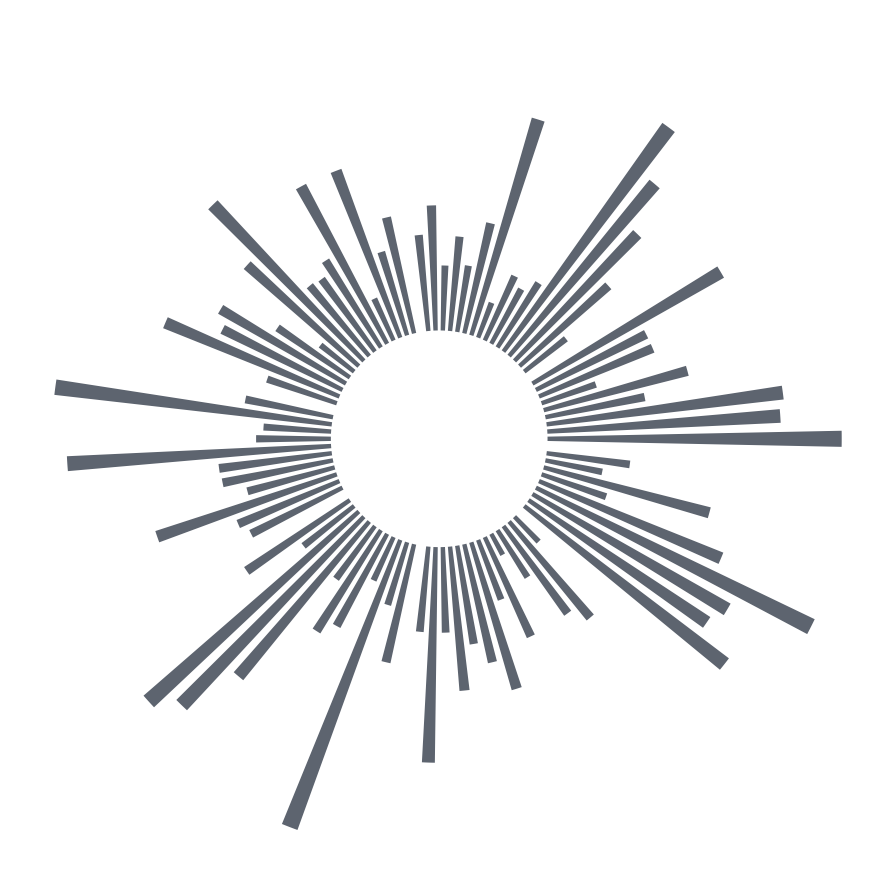

In [272]:
#lObjectsALLcnts = [50, 1, 2, 2, 2, 3, 5, 14, 15, 20, 32, 33]
#lObjectsALLcnts = [0 for i in range(20)] + books[:40] + [0 for i in range(len(books[40:]))]
#books1 = [0 for i in range(20 + len(boooks))] + chapt1[::-1]
#lObjectsALLcnts = [0 for i in range(20)] + boooks[::-1] + [0 for i in range(len(chapt1))]
books1 = [0 for i in range(len(boooks))] + chapt1[::-1] + [0]
lObjectsALLcnts =  boooks[::-1] + [0 for i in range(len(chapt1))] + [0]


print(len(books1), len(lObjectsALLcnts))
iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)

theta=np.arange(0,2*np.pi,2*np.pi/iN)
#width = (2*np.pi)/iN *0.5

fig = plt.figure(figsize=(8, 8))
# 0.1, 0.1, 0.75, 0.75
ax = fig.add_axes([0.5, 0.5, 1.5, 1.5], polar=True)
bars = ax.bar(theta, arrCnts, width=0.04, bottom=200, color='#5D646F') ##5D646F
bars = ax.bar(np.arange(0,2*np.pi,2*np.pi/len(books1)), np.array(books1), width=0.04, bottom=200, color = '#5D646F')
ax.set_xticks(theta)
plt.axis('off')
plt.savefig('../plt.png')